# Late Payment Classifier Model

In [1]:
# Import the LatePaymentClassifier module 
from LatePaymentPackage import LatePaymentClassifier

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/26 13:01:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Set your dataset directory here
# If you have have your datasets in different categories, you can skip this cell
datasetDirectory = "yourDataset/Datasets/"

In [3]:

# Initialize the object with the file names
# If your datasets are in different categories, provide the path directly seperated by / for each of the below files
lpc = LatePaymentClassifier(
                             file1 = datasetDirectory+"2017.rpt", # Year1 Property Master data 
                             file2 = datasetDirectory+"2018.rpt", # Year2 Property Master data
                             file3 = datasetDirectory+"2019.rpt", # Year3 Property Master data
                             file4 = datasetDirectory+"2020.rpt", # Year4 Property Master data
                             fileCurrentYear = datasetDirectory+"2021.rpt", # Current Year data - to be predicted
                             fileHeader = datasetDirectory+"Header.rpt",  # Header file for property master
                             fileDueDates = datasetDirectory+"InstDates.csv", # Updated Tax Due dates csv file
                             pmtFile1 = datasetDirectory+"TY2017.rpt", # Year1 Payment Master data
                             pmtFile2 = datasetDirectory+"TY2018.rpt", # Year2 Payment Master data
                             pmtFile3 = datasetDirectory+"TY2019.rpt", # Year3 Payment Master data
                             pmtFile4 = datasetDirectory+"TY2020.rpt", # Year4 Payment Master data
                             pmtCurrentYear = datasetDirectory+"TY2021.rpt", # Current Year payment master data
                             currentYear = 2021 # Enter the current year
                            )


In [4]:
# Run Data Transformation and Model
lpc.readData()
lpc.simpleTransform()
lpc.woeTransform()
lpc.windowTransform()
lpc.otherTransform()
lpc.trainTestSplit()
lpc.fit()
lpc.getResults()
lpc.getFeatureImportance()
lpc.getGainLiftChart()
print("Model has been executed!")

Reading Data.....


Initial property master dataset size: [9325502, 81]
Running simple transformations.....


Dataset size after simple transformation: [4280384, 37]
Running WOE transformations.....


Dataset size after WOE Transformation: [4280384, 37]
Running window transformations.....


Dataset size after window transformation: [4280384, 40]
Running few other transformations.....


Dataset size for model building: [4280384, 29]
Splitting into train and test data.....


Dataset size for training: [3384091, 29]


Dataset size for testing: [896293, 29]
Fitting the model.....


Retreiving the most important features.....
Obtaining Gain-Lift charts.....
Model has been executed!


# Output

In [5]:
# Show the results
lpc.results

,Threshold,Acc,F1,Rec,Prec
0,0.20,0.691972,0.549625,0.874482,0.400752
1,0.25,0.765783,0.605545,0.836443,0.474547
2,0.30,0.822124,0.658585,0.798206,0.560536
3,0.35,0.847467,0.682241,0.761854,0.617693
4,0.40,0.865060,0.696533,0.720513,0.674099
5,0.45,0.872574,0.698977,0.688318,0.709970
6,0.50,0.877754,0.698148,0.657743,0.743842


In [6]:
# Export predictions to CSV
lpc.exportToCSV()

CSV Exported to: /Users/sagarshekhargoudapatil/Shashank/Predictions.csv


23/07/26 14:04:14 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

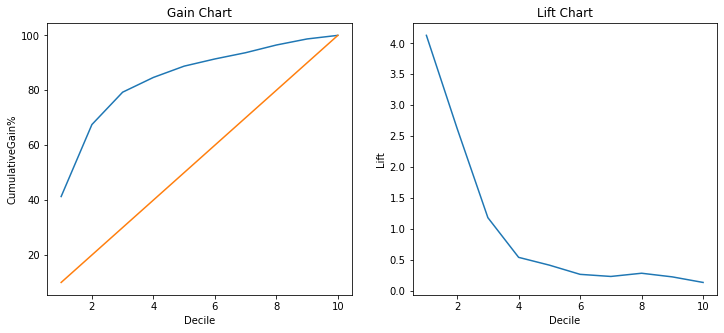

23/07/26 14:04:24 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

In [7]:
# Plot the Gain Lift chart
lpc.plotGainLiftChart()